<a href="https://colab.research.google.com/github/DrakeCS167Fall22/cs167fall22project2-SamTuck29/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
##Name: Samuel Tucker
##Date: 12.14.22

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

###Problem: Classify a shoe into the United States' top 10 shoe brands based on Lowest price, Highest price, Condition, and Availability.

###Target - "Brand": Puma, Adidas, Nike, New Balance, Reebok, Skechers, Converse, Vans, Asics, Burberry


###Features:
###"priceMin": Min: 9.50, Median: 65, Mean: 82.56, Max: 2799.95
###"priceMax": Min: 9.50, Median: 66.50, Mean: 86.15, Max: 2799.95
###"Condition": NewBox: 3070, NewDefect: 24, NewNoBox: 295, NotSpecified: 829, Preowned: 51
###"IsOnSale" (Availabiliy): TRUE: 1060, FALSE: 3209

###Dataset was found on Kaggle [here](https://colab.research.google.com/drive/1R_fBvk0x2Q1dq86f5wMWgxkylUnhFLli?authuser=1#scrollTo=LwseoUsMmCz2&line=11&uniqifier=1)

###Author: Datafiniti


# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

The data was messy. I began by going through and finding what columns I wanted to actually keep. After that, I sifted through the "Brands" column and kept the brands that landed in the top 10 US shoe brands category. I proceeded to rename the values in this column so they were grouped together correctly. priceMin and priceMax were already clean which was great! Condition, on the other hand, was not. I had to group the values in the condition column into their appropriate groups. After that, I was pretty much done. I renamed the columns, dropped a couple outliers, then exported the clean dataset from R.

In Python, I read in the clean dataset, double checked missing data, and created appropriate dummy variables. Next, I split the data into an 80/20 training/testing datasets and normalized it. I also created a dataframe to collect all of the accuracies from each model for comparison at the end.

In [3]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# import libraries
import sklearn
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler #added library for Normalizing
import matplotlib.pyplot as plt #added to make cool plots
%matplotlib inline

In [5]:
# load and prepare your data here
shoe = pd.read_csv("/content/drive/MyDrive/CS167datasets/CLEAN_male_shoe_prices.csv")
shoe.head()

,Brand,PriceMin,PriceMax,Condition,IsOnSale
0,Puma,86.98,86.98,NotSpecified,True
1,Puma,149.00,149.00,NewBox,False
2,Adidas,14.99,14.99,NewBox,False
3,Puma,56.99,56.99,NotSpecified,True
4,Puma,51.99,51.99,NotSpecified,True


In [6]:
#check if clean
print(shoe.isna().any())
# all False ----> Clean!

Brand        False
PriceMin     False
PriceMax     False
Condition    False
IsOnSale     False
dtype: bool


In [7]:
category2 = ['Condition']
# now to creating dummy variables for all my categorical variables EXCEPT brand
# (after I developed my method I realized there's literally a function for it....)
# I guess that's my loss for missing class... (copied from Proj 1)
for col in category2:
  for unique in shoe[col].unique():
    shoe[col + "_" + unique] = 0
    for i in range(len(shoe[col])):
      if (shoe[col].iloc[i] == unique):
        shoe[col + "_" + unique].iloc[i] = 1
      else:
        shoe[col + "_" + unique].iloc[i] = 0
  shoe.drop(columns = col, inplace = True)

print(shoe.head())
#not great column naming... but idc. I gotta move.

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


    Brand  PriceMin  PriceMax  IsOnSale  Condition_NotSpecified  \
0    Puma     86.98     86.98      True                       1   
1    Puma    149.00    149.00     False                       0   
2  Adidas     14.99     14.99     False                       0   
3    Puma     56.99     56.99      True                       1   
4    Puma     51.99     51.99      True                       1   

   Condition_NewBox  Condition_NewNoBox  Condition_Preowned  \
0                 0                   0                   0   
1                 1                   0                   0   
2                 1                   0                   0   
3                 0                   0                   0   
4                 0                   0                   0   

   Condition_NewDefect  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  


In [60]:
# split the data
target= 'Brand'
predictors = shoe.columns.drop(target)
train_data, test_data, train_sln, test_sln = \
    train_test_split(shoe[predictors], shoe[target], test_size = 0.2, random_state=41)

#normalizing data
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

#dataframe to collect accuracies
total_acc = pd.DataFrame({'ML Algorithm':['KNN', 'W KNN', 'DT', 'RF', 'SGD'], 'Accuracy': [0,0,0,0,0]})
print(total_acc)

  ML Algorithm  Accuracy
0          KNN         0
1        W KNN         0
2           DT         0
3           RF         0
4          SGD         0


# 3. Research

Put your code and your experiments here.

In [9]:
# code goes here... don't forget to include graphs. Professor Urness loves graphs.
shoe["Brand"].unique()

array(['Puma', 'Adidas', 'Nike', 'NewBalance', 'Reebok', 'Skechers',
       'Converse', 'Vans', 'Asics', 'Burberry'], dtype=object)

Accuracy: 0.4531615925058548
-------------------------------------------------------
            Puma  Adidas  Nike  NewBalance  Reebok  Skechers  Converse  Vans  \
Puma          46      10    45          22       2         0         1     8   
Adidas         0      11    27           1       0         1         2     3   
Nike          20      20   247          23       6         3         6    15   
NewBalance    11       6    30          13       3         1         2     7   
Reebok        10       2    29           6      15         0         4     2   
Skechers       5       3    15           4       2         5         1     1   
Converse       1       3    13           0       2         1         5     3   
Vans           9       2    22           4       2         1         5    39   
Asics          2       1    20           0       0         0         1     1   
Burberry       0       0     0           0       0         0         0     0   

            Asics  Burberry  
Puma

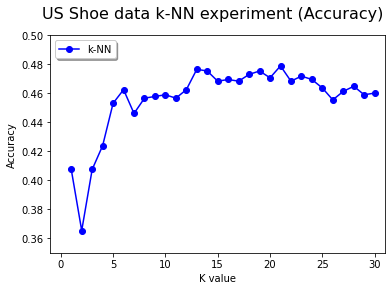

 
optimal accuracy (k =  21 ):  0.47892271662763464


,ML Algorithm,Accuracy
0,KNN,0.4789
1,W KNN,0.0000
2,DT,0.0000
3,RF,0.0000
4,SGD,0.0000


In [62]:
# K Nearest Neighbors!!
# for classification we would use the accuracy metric that gives the percentage
# of how many rows of the test dataset you got correct

#create basic KNN Classifier object
neigh = neighbors.KNeighborsClassifier()

#call fit (to train regression model)
neigh.fit(train_data_normalized, train_sln)

#call predict to generate predictions
shoe_predictions = neigh.predict(test_data_normalized)

#Baseline accuracy
print("Accuracy:", metrics.accuracy_score(test_sln, shoe_predictions))

print("-------------------------------------------------------")
#print out a confusion matrix
shoe_labels= ['Puma', 'Adidas', 'Nike', 'NewBalance', 'Reebok', 'Skechers', 'Converse', 'Vans', 'Asics', 'Burberry']
conf_mat = metrics.confusion_matrix(test_sln, shoe_predictions, labels=shoe_labels)
print(pandas.DataFrame(conf_mat, index = shoe_labels, columns = shoe_labels))


kNN_acc = []
k_val = []
max_acc_idx = 0
for k in range(1,31,1):

  #create basic KNN classifer object
  neigh = neighbors.KNeighborsClassifier(n_neighbors=k)

  #call fit (to train regression model)
  neigh.fit(train_data_normalized, train_sln)

  #call predict to generate predictions
  shoe_predictions = neigh.predict(test_data_normalized)

  #append values to mse and r2
  kNN_acc.append(metrics.accuracy_score(test_sln, shoe_predictions))
  k_val.append(k)
  if (metrics.accuracy_score(test_sln, shoe_predictions) > kNN_acc[max_acc_idx]):
    max_acc_idx = k - 1


#create cool graph
plt.suptitle('US Shoe data k-NN experiment (Accuracy)',fontsize=16)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.plot(k_val,kNN_acc,'bo-',label='k-NN')
plt.legend(loc='upper left', shadow=True)
plt.axis([-1,31,0.35,0.5])
plt.show()

# When k = 21, Accuracy is at its max
print(" ")
print("optimal accuracy (k = ",max_acc_idx + 1,"): ", kNN_acc[max_acc_idx])

#append Accuracy to overall dataframe
total_acc["Accuracy"].iloc[0] = round(kNN_acc[max_acc_idx], 4)

Accuracy: 0.4484777517564403
-------------------------------------------------------
            Puma  Adidas  Nike  NewBalance  Reebok  Skechers  Converse  Vans  \
Puma          53      10    37          22       2         0         1     9   
Adidas         1       9    25           1       2         0         3     3   
Nike          23      33   229          20       6         4         5    14   
NewBalance    12       4    26          15       3         0         1     9   
Reebok        10       1    23           4      19         1         5     3   
Skechers       7       2    12           4       0         7         0     2   
Converse       1       3    11           0       3         0         6     4   
Vans           9       3    21           1       1         2         6    40   
Asics          4       1    18           0       0         0         1     1   
Burberry       0       0     1           0       0         0         0     0   

            Asics  Burberry  
Puma

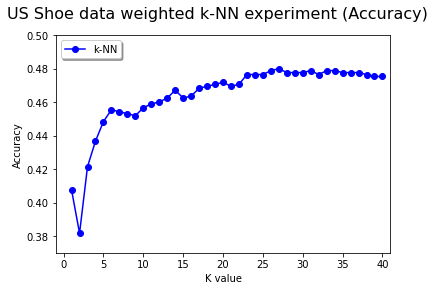

 
optimal accuracy (k =  27 ):  0.48009367681498827


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [63]:
# Next, Weighted K Nearest Neighbors!!!

# Now to run a base model using weighted k nearest neighbors.
#create basic weighted KNN Classifier object
neigh = neighbors.KNeighborsClassifier(weights = 'distance')

#call fit (to train regression model)
neigh.fit(train_data_normalized, train_sln)

#call predict to generate predictions
shoe_predictions = neigh.predict(test_data_normalized)

#Baseline accuracy
print("Accuracy:", metrics.accuracy_score(test_sln, shoe_predictions))

print("-------------------------------------------------------")
#print out a confusion matrix
shoe_labels= ['Puma', 'Adidas', 'Nike', 'NewBalance', 'Reebok', 'Skechers', 'Converse', 'Vans', 'Asics', 'Burberry']
conf_mat = metrics.confusion_matrix(test_sln, shoe_predictions, labels=shoe_labels)
print(pandas.DataFrame(conf_mat, index = shoe_labels, columns = shoe_labels))

w_kNN_acc = []
k_val = []
max_acc_idx = 0
for k in range(1,41,1):

  #create basic weighted KNN classifer object
  neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance')

  #call fit (to train regression model)
  neigh.fit(train_data_normalized, train_sln)

  #call predict to generate predictions
  shoe_predictions = neigh.predict(test_data_normalized)

  #append values to mse and r2
  w_kNN_acc.append(metrics.accuracy_score(test_sln, shoe_predictions))
  k_val.append(k)
  if (metrics.accuracy_score(test_sln, shoe_predictions) > w_kNN_acc[max_acc_idx]):
    max_acc_idx = k - 1


#create cool graph
plt.suptitle('US Shoe data weighted k-NN experiment (Accuracy)',fontsize=16)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.plot(k_val,w_kNN_acc,'bo-',label='k-NN')
plt.legend(loc='upper left', shadow=True)
plt.axis([-1,41,0.37,0.5])
plt.show()

# When k = 27, accuracy is optimized
print(" ")
print("optimal accuracy (k = ",max_acc_idx + 1,"): ", w_kNN_acc[max_acc_idx])

#append Accuracy to overall dataframe
total_acc["Accuracy"].iloc[1] = round(w_kNN_acc[max_acc_idx], 4)

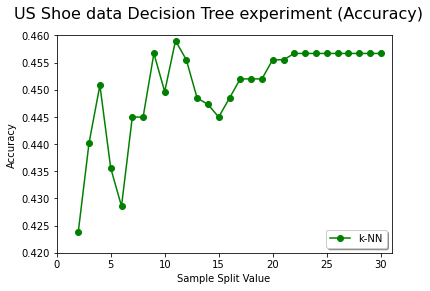

 
optimal accuracy (s =  11 ):  0.45901639344262296
 
            Puma  Adidas  Nike  NewBalance  Reebok  Skechers  Converse  Vans  \
Puma          55       4    52          11       1         0         1    12   
Adidas         2       5    33           1       2         0         0     3   
Nike          23      22   269           5       4         1         1    14   
NewBalance    18       2    36           9       0         0         0     7   
Reebok         8       1    41           2       8         0         1     6   
Skechers       7       1    18           5       0         4         0     2   
Converse       2       1    19           0       1         0         1     4   
Vans          11       1    31           1       1         0         1    37   
Asics          5       0    19           0       0         0         1     1   
Burberry       0       0     1           0       0         0         0     0   

            Asics  Burberry  
Puma            0         0  
Adida

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [64]:
#Next, we'll do a Decision Tree Classification
dt_acc = []
sample_val = []
max_acc_idx = 0
for s in range(2,31,1):

  #create basic dt classifier object
  dt = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = s, random_state=42)

  #call fit (to train regression model)
  dt.fit(train_data_normalized, train_sln)

  #call predict to generate predictions
  shoe_predictions = dt.predict(test_data_normalized)

  #append values to accuracy and sample
  dt_acc.append(metrics.accuracy_score(test_sln, shoe_predictions))
  sample_val.append(s)
  if (metrics.accuracy_score(test_sln, shoe_predictions) > dt_acc[max_acc_idx]):
    max_acc_idx = s - 2


#create cool graphs
plt.suptitle('US Shoe data Decision Tree experiment (Accuracy)',fontsize=16)
plt.xlabel('Sample Split Value')
plt.ylabel('Accuracy')
plt.plot(sample_val, dt_acc,'go-',label='k-NN')
plt.legend(loc='lower right', shadow=True)
plt.axis([0,31,0.42,0.46])
plt.show()

# When s = 11, accuracy is optimized
print(" ")
print("optimal accuracy (s = ",max_acc_idx + 2,"): ", dt_acc[max_acc_idx])

#create optimal Decision Tree Classifier object
dt = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = max_acc_idx + 2, random_state=42)

#call fit (to train regression model)
dt.fit(train_data_normalized, train_sln)

#call predict to generate predictions
shoe_predictions = dt.predict(test_data_normalized)

print(" ")
#print out a confusion matrix
car_body_labels= ['Puma', 'Adidas', 'Nike', 'NewBalance', 'Reebok', 'Skechers', 'Converse', 'Vans', 'Asics', 'Burberry']
conf_mat = metrics.confusion_matrix(test_sln, shoe_predictions, labels=car_body_labels)
print(pandas.DataFrame(conf_mat, index = car_body_labels, columns = car_body_labels))

#append Accuracy to overall dataframe
total_acc["Accuracy"].iloc[2] = round(dt_acc[max_acc_idx], 4)

RANDOM FOREST accuracy score:  0.4613583138173302
                 Predicted Puma  Predicted Adidas  Predicted Nike  \
True Puma                    64                 3              38   
True Adidas                   1                 6              27   
True Nike                    30                17             235   
True NewBalance              17                 3              25   
True Reebok                  12                 0              22   
True Skechers                 9                 0              11   
True Converse                 2                 0              13   
True Vans                    11                 1              20   
True Asics                    6                 0              16   
True Burberry                 0                 0               1   

                 Predicted NewBalance  Predicted Reebok  Predicted Skechers  \
True Puma                          10                 3                   1   
True Adidas                     

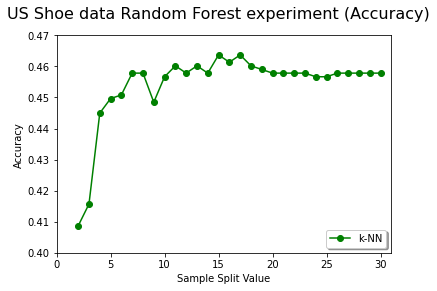

 
optimal accuracy (s =  15 ):  0.4637002341920375
 
                 Predicted Puma  Predicted Adidas  Predicted Nike  \
True Puma                    63                 4              43   
True Adidas                   1                 7              28   
True Nike                    31                18             242   
True NewBalance              18                 4              26   
True Reebok                  11                 0              25   
True Skechers                 9                 0              12   
True Converse                 2                 0              16   
True Vans                    12                 1              23   
True Asics                    6                 0              16   
True Burberry                 0                 0               1   

                 Predicted NewBalance  Predicted Reebok  Predicted Skechers  \
True Puma                          10                 2                   0   
True Adidas                  

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [65]:
#Next, Random Forests...

# create a baseline Random Forest Classifier
forest = RandomForestClassifier(random_state = 0)

#call fit (to train regression model)
forest.fit(train_data_normalized,train_sln)

#call predict to generate predictions
shoe_predictions = forest.predict(test_data_normalized)

#accuracy
print("RANDOM FOREST accuracy score: ", metrics.accuracy_score(test_sln, shoe_predictions))

vals = shoe[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, shoe_predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "True " + vals, columns = "Predicted " + vals))

for_acc = []
depth_val = []
max_acc_idx = 0
for d in range(2,31,1):

  #create basic random forest classifier object
  forest = RandomForestClassifier(random_state = 0, n_estimators = 500, criterion = "entropy", max_depth = d)

  #call fit (to train regression model)
  forest.fit(train_data_normalized, train_sln)

  #call predict to generate predictions
  shoe_predictions = forest.predict(test_data_normalized)

  #append values to accuracy
  for_acc.append(metrics.accuracy_score(test_sln, shoe_predictions))
  depth_val.append(d)
  if (metrics.accuracy_score(test_sln, shoe_predictions) > for_acc[max_acc_idx]):
    max_acc_idx = d - 2


#create cool graphs
plt.suptitle('US Shoe data Random Forest experiment (Accuracy)',fontsize=16)
plt.xlabel('Sample Split Value')
plt.ylabel('Accuracy')
plt.plot(depth_val, for_acc,'go-',label='k-NN')
plt.legend(loc='lower right', shadow=True)
plt.axis([0,31,0.4,0.47])
plt.show()

print(" ")
print("optimal accuracy (s = ",max_acc_idx + 2,"): ", for_acc[max_acc_idx])

#create optimal Random Forest Classifier object
forest = RandomForestClassifier(random_state = 0, n_estimators = 1000, criterion = "entropy", max_depth = max_acc_idx + 2)

#call fit (to train classification model)
forest.fit(train_data_normalized, train_sln)

#call predict to generate predictions
shoe_predictions = forest.predict(test_data_normalized)

print(" ")
#print out a confusion matrix
vals = shoe[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, shoe_predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "True " + vals, columns = "Predicted " + vals))

#append Accuracy to overall dataframe
total_acc["Accuracy"].iloc[3] = round(for_acc[max_acc_idx], 4)

SGD baseline accuracy: 0.4648711943793911
 


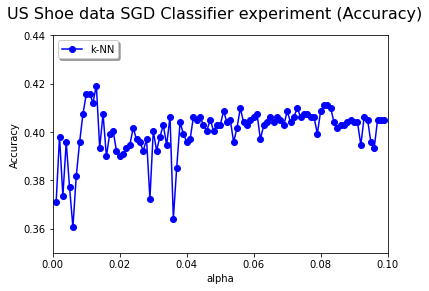

 
optimal accuracy (alpha =  0.013 ):  0.41920374707259955
 
                 Predicted Puma  Predicted Adidas  Predicted Nike  \
True Puma                    48                 0              87   
True Adidas                   6                 0              38   
True Nike                    30                 0             309   
True NewBalance              12                 0              59   
True Reebok                  14                 0              53   
True Skechers                 6                 0              30   
True Converse                 3                 0              24   
True Vans                    32                 0              52   
True Asics                    2                 0              25   
True Burberry                 0                 0               3   

                 Predicted NewBalance  Predicted Reebok  Predicted Skechers  \
True Puma                           0                 0                   0   
True Adidas          

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [66]:
from sklearn.linear_model import SGDClassifier

# now to create a basic SDG Classifier
sgd = SGDClassifier(random_state = 0)

#call fit (to train classification model)
sgd.fit(train_data_normalized, train_sln)

#call predict to generate predictions
shoes_predictions = sgd.predict(test_data_normalized)

#accuracy
print("SGD baseline accuracy:", metrics.accuracy_score(test_sln, shoe_predictions))
print(" ")

#Now to tune the SGD
SGD_acc = []
ratio_val = []
max_acc_idx = 0
for r in range(1,100):

  # create SGDClassifier
  sgd = SGDClassifier(random_state=0, alpha = (r/1000))

  #call fit (to train classification model)
  sgd.fit(train_data_normalized,train_sln)

  #call predict to generate predictions
  shoe_predictions = sgd.predict(test_data_normalized)
  
  #append accuracy
  SGD_acc.append(metrics.accuracy_score(test_sln, shoe_predictions))
  ratio_val.append((r/1000))
  if (metrics.accuracy_score(test_sln, shoe_predictions) > SGD_acc[max_acc_idx]):
    max_acc_idx = r - 1


#create cool graphs
plt.suptitle('US Shoe data SGD Classifier experiment (Accuracy)',fontsize=16)
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.plot(ratio_val,SGD_acc,'bo-',label='k-NN')
plt.legend(loc='upper left', shadow=True)
plt.axis([0,0.1, 0.35,0.44])
plt.show()

print(" ")
print("optimal accuracy (alpha = ",(max_acc_idx + 1)/1000,"): ", SGD_acc[max_acc_idx])

#create optimal SGD Classifier object
sgd = SGDClassifier(random_state=0, alpha = (max_acc_idx + 1)/1000)

#call fit (to train classification model)
sgd.fit(train_data_normalized, train_sln)

#call predict to generate predictions
shoe_predictions = sgd.predict(test_data_normalized)

print(" ")
#print out a confusion matrix
vals = shoe[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, shoe_predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "True " + vals, columns = "Predicted " + vals))

#append Accuracy to overall dataframe
total_acc["Accuracy"].iloc[4] = round(SGD_acc[max_acc_idx], 4)

In [69]:
#punchline
total_acc.sort_values(by = ["Accuracy"], ascending = False)

,ML Algorithm,Accuracy
1,W KNN,0.4801
0,KNN,0.4789
3,RF,0.4637
2,DT,0.4590
4,SGD,0.4192


#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

To begin, I didn't expect a very accuracte model. I mean, I'm asking based on just a few features for the model to classify between 10 DIFFERENT shoe brands. The fact that the model came close to the chances of winning a coin toss is pretty impressive. So let's give credit where credit is due. Numbers aren't everything.

Weighted KNN came in with the highest accuracy and honestly that doesn't surprise me. Again, we're trying to classify 10 different shoe brands. So, making an educated guess based on "nearness" doesn't seem super far fetched. The rest of the algorithms land where I would expect them to. Nothing super notable. I will give an honorable mention to SGD, though. I think SGD is my favorite ML algorithm, but here it didn't perform well. Why? Well I think it's because there is a large margin for error because of the 10 different shoe brands. At the end of the day, I'm satisfied with the way these ML algorithms did in the face of a tough problem.

Analysis wouldn't be analysis without SOME comment on the data. 4 features? That's all? I know. It's kind of disappointing to me too. The dataset looked promising, but as I continued to clean, the number of features slowly decreased. Honestly, I'm happy we had 4, because if I ended up with any less, I likely would have had to find a new dataset, which is not ideal when you're completing a project the day it's due. Anyways, the 4 features were okay. Lowest price, Highest price, Condition, and Availability. They're not terrible, but it doesn't give us a whole lot to work with in terms trying to classify a shoe brand. Some other variables that might be helpful with further analysis would be color scheme, size, weight, shoelace type, the manufacturering company's country to name a few. But hey, 48% with what we had. Not bad, I'd say.



# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

I think my biggest challenge was cleaning the data. When I first found the dataset, I was happy with it because it looked like it contained alot of features that I could use, but once I got into it, there weren't many features that were actually useful. At the end of the day, I was left with the 4 features that I used for the above analysis, and they didn't do too terrible. I was content with what I had. Other than that, I didn't encounter anything super crazy. It was smooth sailing.